## **SMS Spam classification**
The given dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

**Task is to build a prediction model that will accurately classify which texts are spam**

## **Steps:**
- Importing Libraries
- Exploring the Dataset & removing unwanted columns
- Exploratory Data Analysis
 - Univariate Analysis
 - Text Analysis 
- Feature Engineering - CountVectorisation
- preprocessing data before loading to data 
- Predictive analysis 
- Conclusion


## **1. Importing Libraries**

In [0]:
#importing the necessary packages to process or plot the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

**Read the text file with the help of pandas read_table function**

In [0]:

data = pd.read_table('/content/SMSSpamCollection',sep='\t',names=['v1','v2'])


In [67]:
# using the head function see what is originlly present in the dataset
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Shape of the dataset**

In [68]:
# shape method gives the shape of dataframe
data.shape

(5572, 2)

Again take a look at the data,run below cells

In [69]:
data.describe(include='all')

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [70]:
#describe data by group - use pandas groupby('v1').describe() method
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

whats your inference??

In [71]:
#Calculating the length of all the messages
data['length']=data['v2'].apply(len)
data.head()



,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [74]:

data.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
data.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


## Distribution spam/non-spam plots

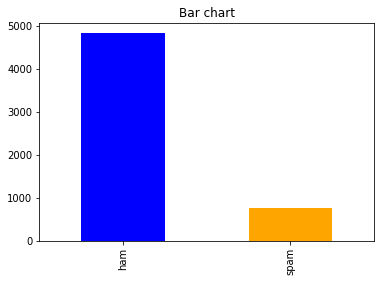

In [76]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

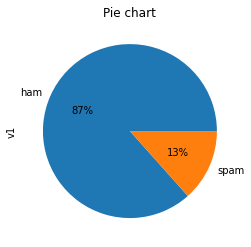

In [77]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.show()

####

## **Text Analysis**
It is an important step when dealing with text data

**We want to find the frequencies of words in the spam and non-spam messages. 
We use the function Counter.**

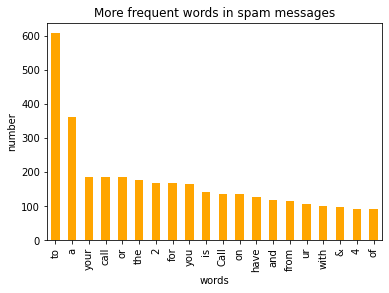

In [79]:
#import counter function
from collections import Counter

#using counter
count1 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df1["words in spam"]))
plt.xticks(y_pos, df1["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


<b>We can see that the majority of frequent words in msgs are **'the', 'to', 'a', 'or' and so on. These are called stop words and are a part of english grammer,but they don't really convey your message, we need to find the actual vocabulary words which contribute to the meaning**</b><p>
With stop words we refer to the most common words in a lenguage, there is no simgle, universal list of stop words. <p>

<b>Using skearn , we will import the stopwords dataset listed,and remove them from our messages and again analyse the messages</b>
## <b>Now we will remove the stopwords and again do the analysis</b>

In [0]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
#removing the stop-words from the messages(complete dataset)
data['v2']=data['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

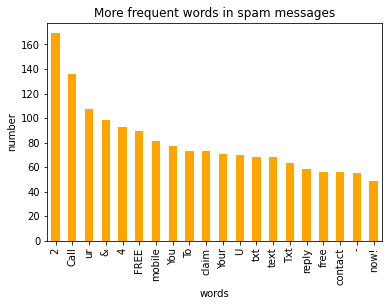

In [81]:
## todo: rewrite the counter code here, and check the most frequent words 
#using counter
count1 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df1["words in spam"]))
plt.xticks(y_pos, df1["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

<b>Above after removing the stop words , we can actually find some meaningful words, like "Free","Contact" which can be actially found in spam mails</b>

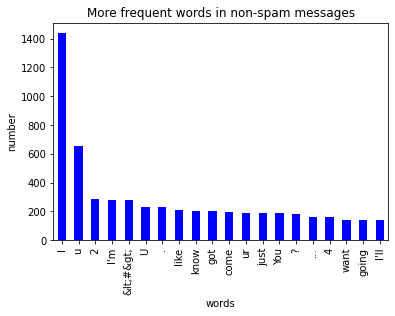

In [82]:
##todo:Do the same for finding most frequent words in Non-Spam messages:

#note: stop words are already removed from all ham/spam sentences 

#using counter
count2 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in non-spam", 1 : "count_"})
df2.plot.bar(legend = False, color = 'blue')
y_pos = np.arange(len(df2["words in non-spam"]))
plt.xticks(y_pos, df2["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

<b>We can see that the majority of frequent words in both classes are **stop words** such as 'to', 'a', 'or' and so on.</b><p>
With stop words we refer to the most common words in a lenguage, there is no simgle, universal list of stop words. <p>
**In the next step,  feature engineering we will remove these stop words which don't majorly contribute in prediction**

## **Feature engineering**

## **First we need to understand how to Prepare Text Data for Machine Learning**
## **1. Intution/logic:**
- Text data requires special preparation before you can start using it for predictive modeling.
- The text must be parsed to remove words, called tokenization. 
- Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature extraction (or vectorization).
-scikit-learn library offers easy-to-use tools to perform both tokenization and feature extraction of your text data
- **Since we cannot work with words directly we convert text to fixed-length vectors of numbers - also called Bag-of-words model** 
## **So Intution is to input Vectors --> model -->output class(spam/ham)**
-The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

- Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

## **2. Vectorisation:**
- This can be done by assigning each word a unique number. 
- Then any document we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. 
- The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.
- An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.
-  eg. he is a boy 
            attribute name assigned to words : he ->1 , is ->2 , a->3 , boy->4
            considering the above sentence -count the occurance of each word 
            so vector is [1 1 1 1]
-  The above logic is applied for complete corpus(text dataset)

(Note: This is just a basic intution for understanding in detail pls refer <html><a href="https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/"><b>this link</b></a></html>) 
            
## **3. Scikit learn Count Vectorizers:** 
- Count Vectorizers provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.    
## Below is an example for reference:

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


**Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors.**
**We remove the stop words in order to improve the analytics**

## **TODO: Vectorize spam message data ie. data["v2"]**
## You will be amazed by looking at the vocabulary

In [145]:
#todo : vectorise the messages

from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = data['v2']
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
#print the vocalbulary - very large
# print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

(5572, 8675)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


We have created more than 8400 new features. The new feature $j$ in the row $i$ is equal to 1 if the word $w_{j}$ appears in the text example $i$. It is zero if not.

## **Predictive Analysis**

First we transform the variable spam/non-spam into binary variable(Binary Classification), then we split our data set in training set and test set. 

In [91]:

data.head()

,v1,v2,length
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,ham,U dun say early hor... U c say...,49
4,ham,"Nah I don't think goes usf, lives",61


In [92]:
data['label_num']=data.v1.map({'ham':0,'spam':1})
data.head()

,v1,v2,length,label_num
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155,1
3,ham,U dun say early hor... U c say...,49,0
4,ham,"Nah I don't think goes usf, lives",61,0


**train-test split**


In [93]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label_num'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8675), (1839, 8675)]


In [94]:
print(y_train[:5])

3235    0
945     0
5319    0
5528    0
247     0
Name: label_num, dtype: int64


In [0]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [0]:
#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [0]:
#defining functions for training and testing data

def training(clf,X_train,y_train):
    clf.fit(X_train,y_train)
    
#function for predicting labels

def predict(clf,X_test):
    return clf.predict(X_test)

In [0]:
#defining a dictionary of classifier
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [0]:
#predict and storing score of each classifier
score = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    pred = predict(c,X_test.toarray())
    score.append((n,accuracy_score(y_test,pred),precision_score(y_test,pred),recall_score(y_test,pred),f1_score(y_test,pred)))


In [138]:
print(score)

[('SVM', 0.9891245241979336, 0.9956140350877193, 0.9227642276422764, 0.9578059071729957), ('MultinomialNB', 0.9804241435562806, 0.8917910447761194, 0.9715447154471545, 0.9299610894941633), ('GaussianNB', 0.9053833605220228, 0.5932642487046632, 0.9308943089430894, 0.7246835443037974), ('logistic', 0.9809679173463839, 0.9606986899563319, 0.8943089430894309, 0.9263157894736842), ('RandomForest', 0.977705274605764, 1.0, 0.8333333333333334, 0.9090909090909091), ('Adaboost', 0.9766177270255574, 0.9432314410480349, 0.8780487804878049, 0.9094736842105263)]


In [139]:
score_df=pd.DataFrame(score,columns=['classifier','acc','precision','recall','f1_score'])
#Adding accuracy column
score_df['Accuracy (%)']=score_df['acc']*100
score_df

,classifier,acc,precision,recall,f1_score,Accuracy (%)
0,SVM,0.989125,0.995614,0.922764,0.957806,98.912452
1,MultinomialNB,0.980424,0.891791,0.971545,0.929961,98.042414
2,GaussianNB,0.905383,0.593264,0.930894,0.724684,90.538336
3,logistic,0.980968,0.960699,0.894309,0.926316,98.096792
4,RandomForest,0.977705,1.000000,0.833333,0.909091,97.770527
5,Adaboost,0.976618,0.943231,0.878049,0.909474,97.661773


In [0]:
# Extra : You can also use GridSearch for fine tuning the models.

Between these models with the highest possible precision, we are going to select the one which has more test accuracy. Clearly SVM is a WINNER

#### Confusion matrix with support vector machine classifier.

In [141]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test.toarray()))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0(ham)', 'Predicted 1(spam)'],
            index = ['Actual 0(ham)', 'Actual 1(spam)'])

,Predicted 0(ham),Predicted 1(spam)
Actual 0(ham),1592,1
Actual 1(spam),19,227


#### We misclassify 19 spam as non-spam messages whereas only 1 ham(non-spam) message is misclassified.

## Conclusion

**The best model found is support vector machine with 98.9% validation accuracy.** <p>
**It classifies 99.5% non-spam message correctly (Model precision)** <p> 
**It classifies the 92.2% of spam messages correctly (Model recall)**<p>